In [1]:
# 1. Explotatory Data Analysis(EDA):
# (1) Analysis of the features
# (2) Finding any relations or trends considering multiple features

#  2. Feature Engineering and Data Cleaning:
# (1) Adding any few features
# (2) Removing redundant features
# (3) converting features into suitable form for modeling

# 3. Predictive Modeling
# (1) Running Basic Algorithms
# (2) cross validation
# (3) Ensembling
# (4) Important Features Extraction



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [3]:
train_raw = pd.read_csv('./kaggle_data/1_titanic_data/train.csv', encoding='utf-8')
print(train_raw.shape)
train_raw.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_raw = pd.read_csv('./kaggle_data/1_titanic_data/test.csv', encoding='utf-8')
test_raw['Survived']= 0
test_raw= test_raw[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
print(test_raw.shape)
test_raw.head(3)

In [ ]:
print(train_raw.shape)  # (891, 12)
print(test_raw.shape) # (418, 12)  key 892
test_raw_start= test_raw.shape[0]

In [4]:
#data.isnull().any()
data.isnull().sum()
# Age, Cabin, Embarked have null values. i will try to fix them.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

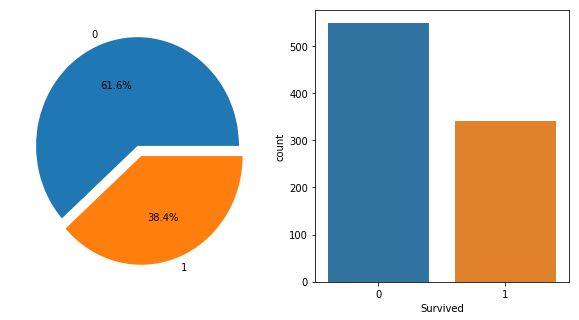

In [5]:
# how many survived ?
#fig= plt.figure(figsize=(18,8))
f,ax= plt.subplots(1,2, figsize=(10,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= ax[0])
#ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data= data, ax= ax[1])
#ax[1].set_title('Survived')
plt.show()

In [6]:
# We will try to check the survival rate by using the different features of the dataset.
# Some of the features being Sex, Port of Embarcation, Age, etc

In [7]:
# Tyoe of features
# (1) Categorical features : Sex, Embarked
# (2) Ordinal features : PClass
    # this is similar to categorical features, but the difference between them is that 
    # we can have relative ordering or sorting between the values.
# (3) Continuous features: Age



In [8]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

# df.groupby('A')['B'].mean()
# df['B'].groupby('A').mean() (X)
# df[['A',B']].groupby('A').mean() (동일)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

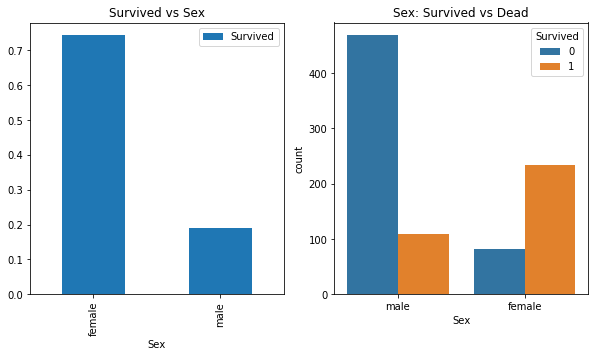

In [9]:
#(1) Categorical features : Sex
    
f,ax= plt.subplots(1,2, figsize=(10,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# data.groupby(['Sex'])[['Survived']].mean() 와 동일
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data= data, ax= ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [10]:
#(1) Categorical features : Embarked

In [11]:
#(2) Ordinal features : PClass

In [12]:
data['Pclass'].value_counts()
data.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
pd.crosstab(data.Pclass, data.Survived, margins= True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


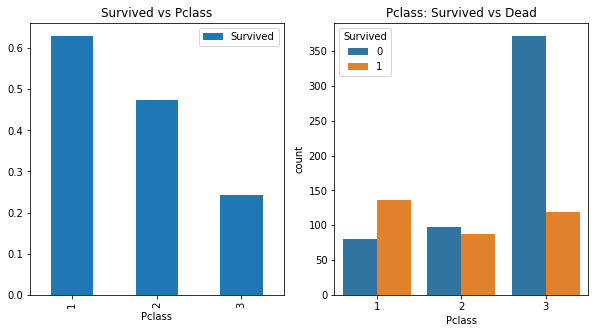

In [14]:
f,ax= plt.subplots(1,2, figsize=(10,5))
data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot('Pclass', hue='Survived', data= data, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [15]:
data.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

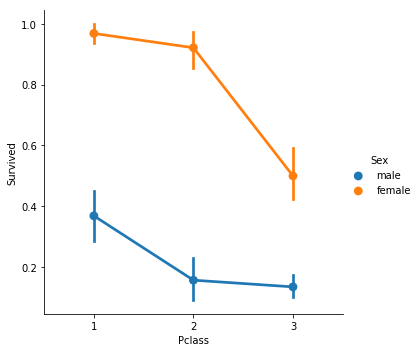

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [17]:
#(3) Continuous features: Age

In [18]:
print(data['Age'].max())
print(data['Age'].min())
print(data['Age'].mean())
data[['Age']].describe()

80.0
0.42
29.69911764705882


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


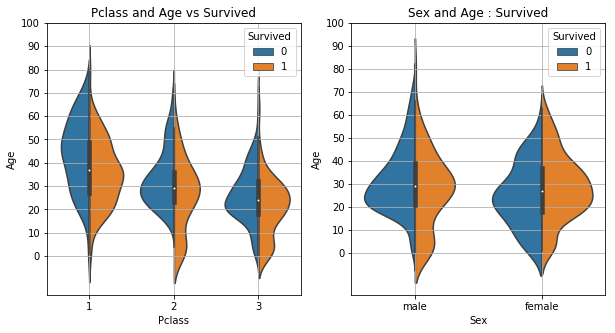

In [19]:
f,ax= plt.subplots(1,2, figsize=(10,5))
sns.violinplot('Pclass', 'Age', hue='Survived', data= data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data= data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age : Survived')
ax[1].set_yticks(range(0,110,10))
ax[0].grid()
ax[1].grid()
plt.show()

In [20]:
# the number of children increases with Pclass and the survival rate for passengers below age 10
# look to be good irrespective of the Pclass
# Survival chances for passengers aged 20-50 from Pclass1 is high
# for males, the survival chanes decreases with the increase in age

In [21]:
data['Age'].isnull().sum()

177

In [22]:
data['Initial']=0
for i in data:
    data['Initial']= data.Name.str.extract('([A-Za-z]+)\.')  
# extract the salutations
    

In [23]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')
# there are some misspelled initals like Mlle or Mme thata stand for Miss. 
# i will replace them with Miss and same thing for other values.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [24]:
df_temp= pd.crosstab(data.Sex, data.Initial)
print(df_temp.columns[df_temp.iloc[0] > 0 ])
print(df_temp.columns[df_temp.iloc[1] > 0])

# Countess 백작부인

data['Initial'].replace(['Countess', 'Dr', 'Lady', 'Mlle', 'Mme', 'Ms'], 
                        ['Mrs', 'Miss', 'Miss', 'Miss', 'Miss', 'Mrs'], inplace= True)

data['Initial'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 
                        ['Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr'], inplace= True)

Index(['Countess', 'Dr', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms'], dtype='object', name='Initial')
Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Master', 'Mr', 'Rev',
       'Sir'],
      dtype='object', name='Initial')


In [25]:
print(data.groupby('Initial')['Age'].mean())
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] =  5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] =  23
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] =  33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] =  36


Initial
Master     4.574167
Miss      22.762821
Mr        32.891990
Mrs       35.800000
Name: Age, dtype: float64


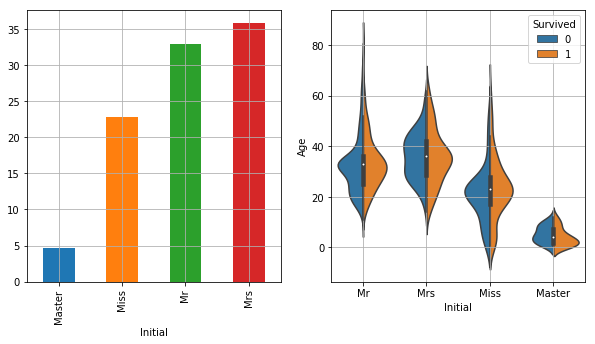

In [26]:
# filling Nan Ages
#이니셜에 따른 Age의 평균, 분포
#f,ax= plt.subplots(1,2, figsize=(10,5))
f,ax= plt.subplots(1,2, figsize=(10,5))
data.groupby(['Initial'])['Age'].mean().plot.bar(ax=ax[0])
sns.violinplot('Initial', 'Age', hue='Survived', data= data, split=True, ax=ax[1])
ax[0].grid()
ax[1].grid()
plt.show()


In [27]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Initial        False
dtype: bool

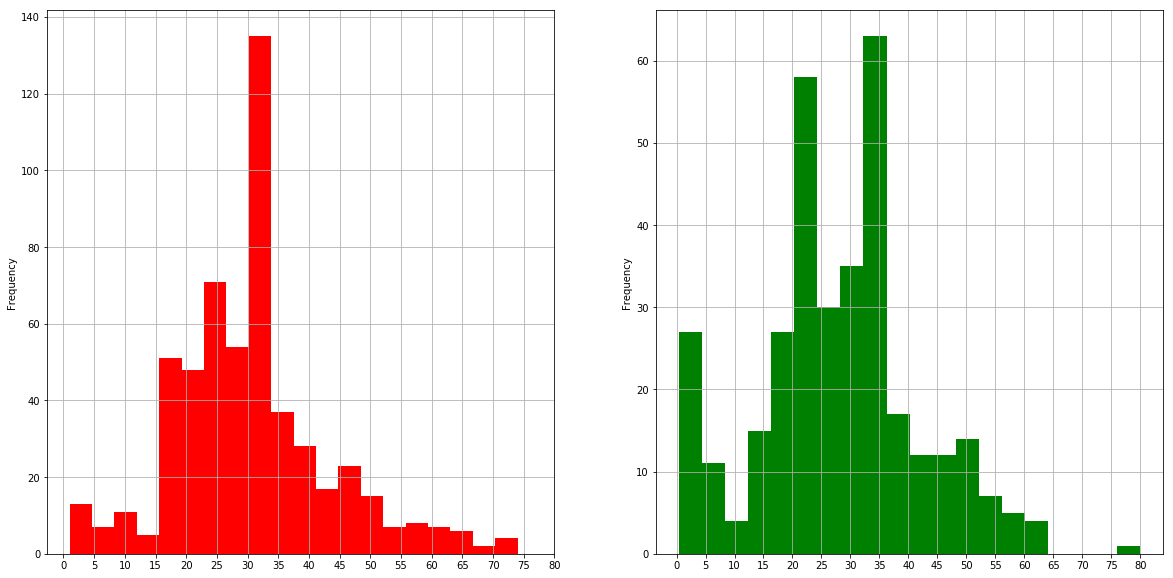

In [28]:
f,ax= plt.subplots(1,2,figsize=(20,10))
# data.loc[data['Survived']==0, 'Age'].hist(bins=20)
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20,color='r')
x1= list(range(0,85,5))
x2= list(range(0,85,5))
ax[0].set_xticks(x1)
ax[1].set_xticks(x2)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20,color='g')
ax[0].grid()
ax[1].grid()
plt.show()

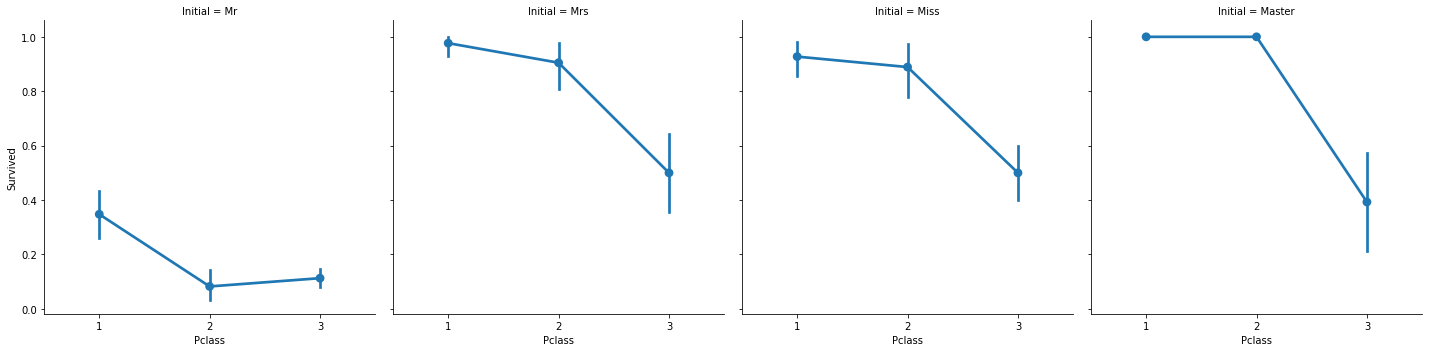

In [29]:
sns.factorplot('Pclass', 'Survived', col='Initial', data= data)
plt.show()

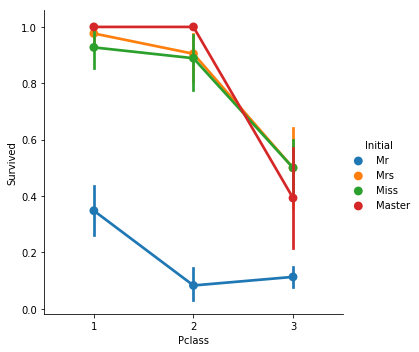

In [30]:
sns.factorplot('Pclass', 'Survived', hue='Initial', data=data)
plt.show()

In [31]:
# categorical value : embarked
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins= True).style.background_gradient(cmap='summer_r')

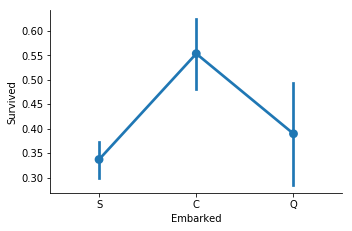

In [32]:
#Chances for survival by port of embarkation
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)

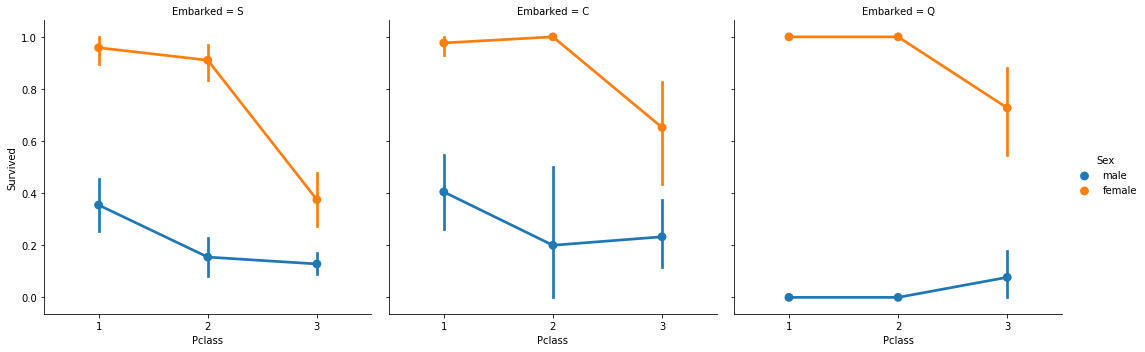

In [33]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data= data)
plt.show()

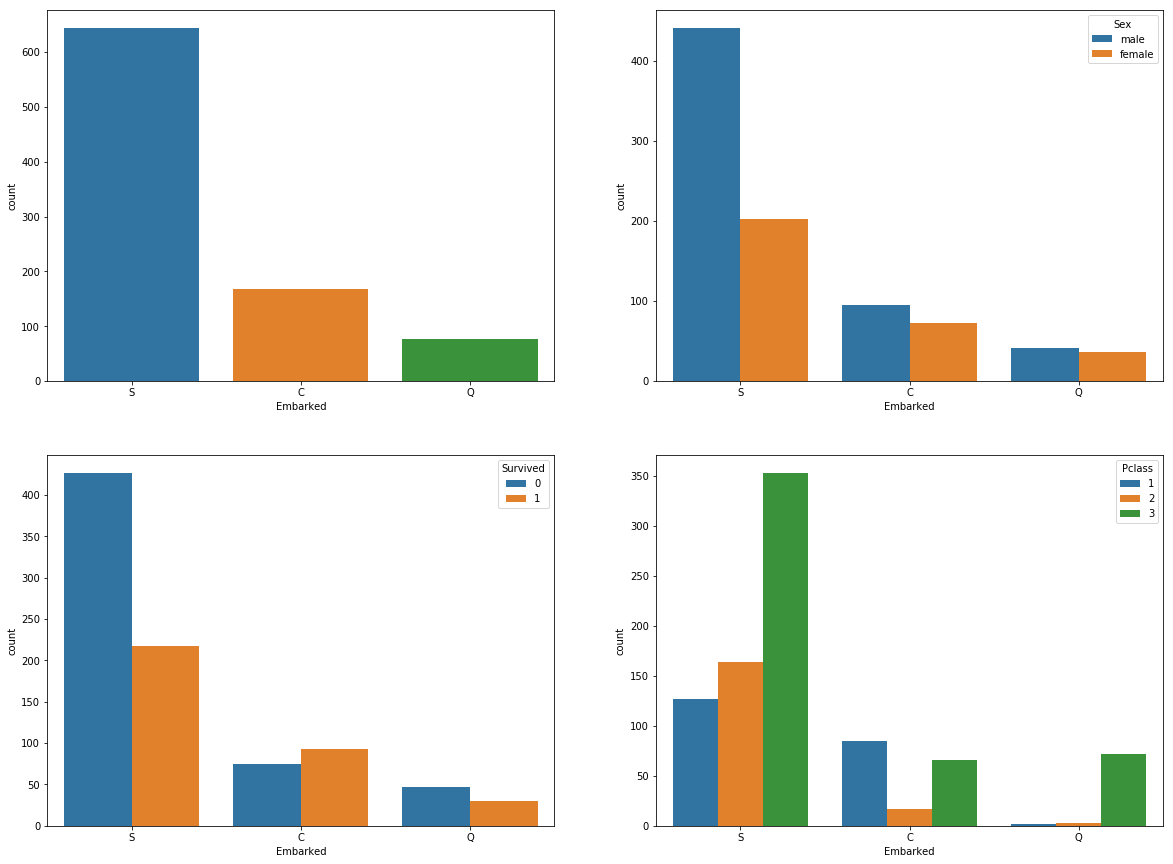

In [34]:
f,ax= plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
sns.countplot('Embarked', hue='Survived', data= data, ax=ax[1,0])
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
plt.show()

#Maximum passensers boarded from S, Majority of them being from pclass 3
# the passengers from C looks to be lucky as a good proportion of them survived
# the reason for this maybe the rescue of all the Pclass1 and Pclass2
# Port Q has almost 95% of the passengers were from Pclass3

In [35]:
data['Embarked'].fillna('S', inplace= True)
data.Embarked.isnull().any()

False

In [36]:
# Discrete feature : SibSip
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


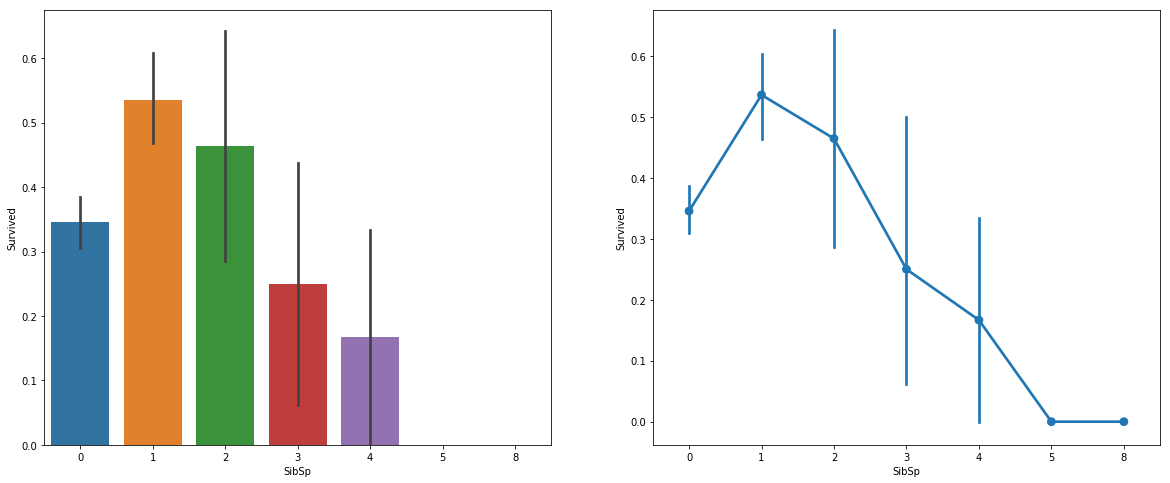

In [37]:
f, ax= plt.subplots(1,2, figsize= (20,8))
sns.barplot('SibSp', 'Survived', data= data, ax=ax[0])
sns.factorplot('SibSp', 'Survived', data= data, ax= ax[1])
plt.close(2)
plt.show()

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [39]:
# Parch
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [40]:
# parch ????


In [41]:
# Continous feature: Fare
print(data.Fare.max())
print(data.Fare.min())
print(data.Fare.mean())

512.3292
0.0
32.2042079685746


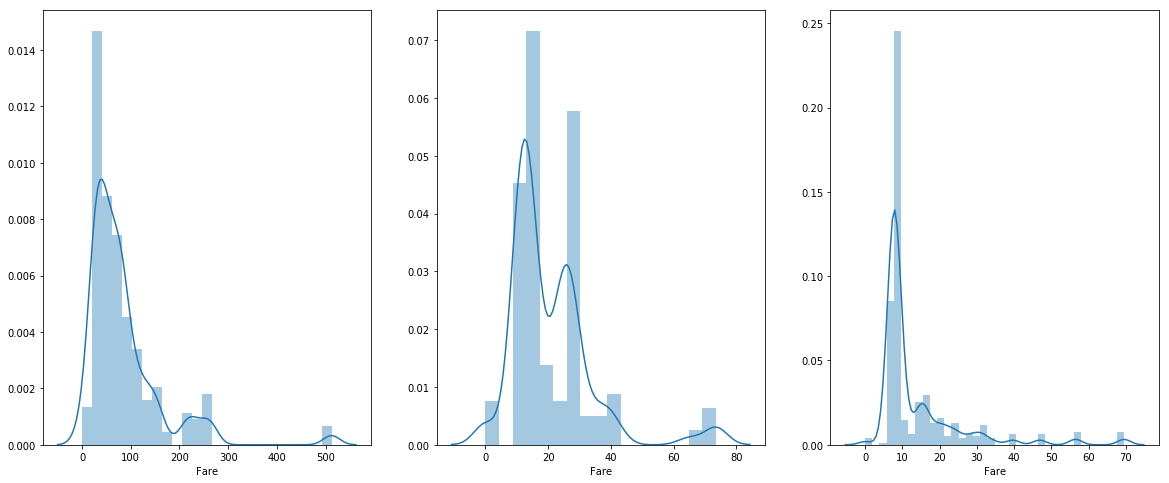

In [42]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
# there looks to be a large distribution in the fares of Passengers in Pclass1
# and this distribution goes on decreasing as the standards reduces
# as this is also continuous, we can convert into discrete values by using binning

In [43]:
# observation for all features


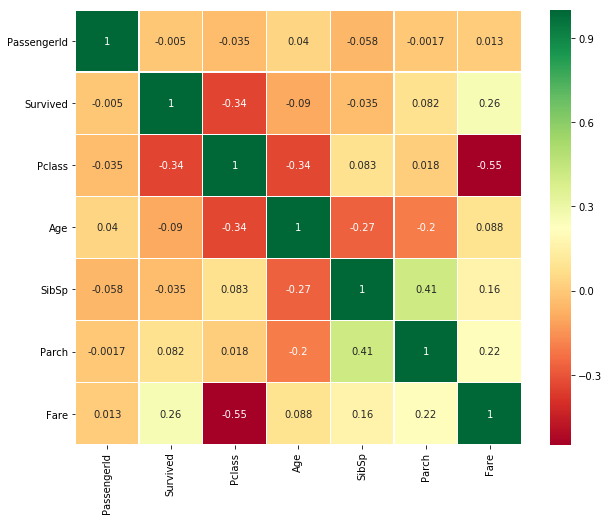

In [44]:
# Correlation between the features
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [45]:
# feature engineering and data cleaning
# we can get any new features and eliminate a few.
# we will transform the exisiting relevant features to suitable form for model

In [46]:
# Age band
# age is a continous feature, there is a problem 
#with continuous variables in machine learning models
# if we want to group person by age, then how would you do it,
# if there are 30 persons, there may be 30 age values.
# we need to convert these continous values into categorical
# by either binning or normalisation.

# maximum age = 80, divide the range from 0-80 into 5 bins.
# so 80/5 = 16, bins of size is 16

# data['Age_band']=0
# data.loc[data['Age']<=16, 'Age_band']


bins= np.arange(16,80,16)
bins

array([16, 32, 48, 64])

In [47]:
which_bin= np.digitize(data['Age'], bins= bins)
data['Age_band']= pd.Series(which_bin, index= data.index)

In [48]:
# x<16 0 16<= x<32사이 1, 32<=x <48사이 2, 
# 48<=x <64사이 3, x>64 4

In [49]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,333
0,87
3,76
4,13


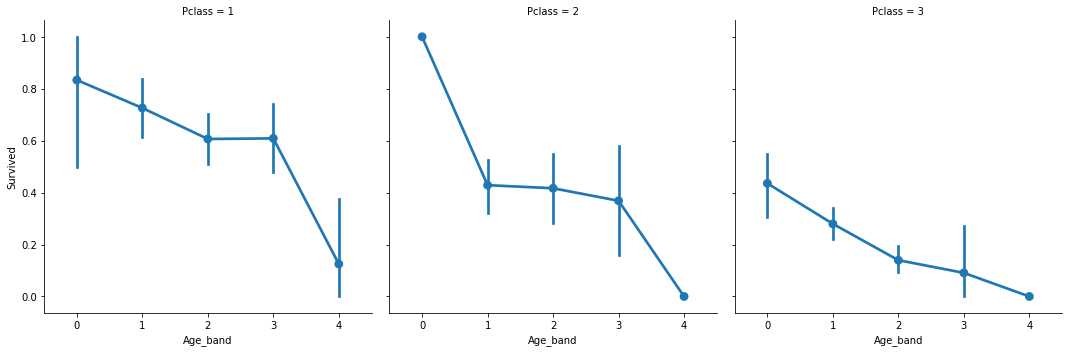

In [50]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

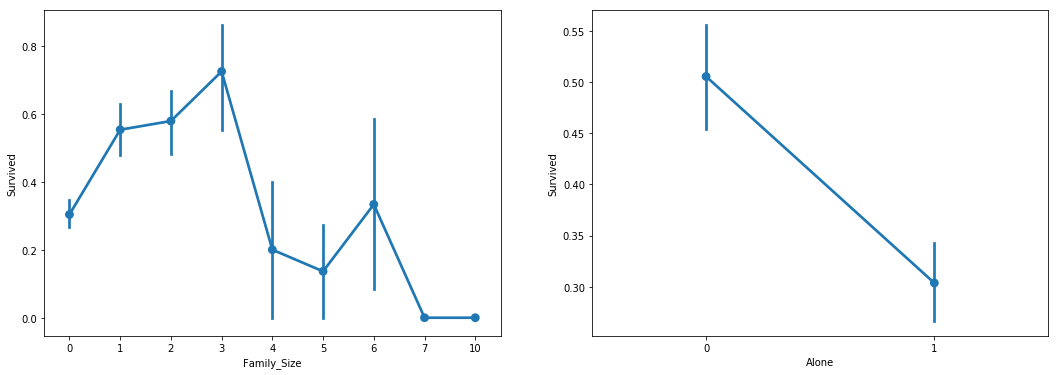

In [51]:
# Family size and alone
# we can creatre a new feature called 'Family size', 'Alone'
# this feature is the summation of Parch and SibSp.
data['Family_Size']= 0
data['Family_Size']= data['Parch']+data['SibSp']
data['Alone']= 0
data.loc[data.Family_Size==0, 'Alone']= 1

f,ax= plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size', 'Survived',data=data, ax=ax[0])
sns.factorplot('Alone', 'Survived',data=data, ax=ax[1])
plt.close(2)
plt.close(3)
plt.show()


In [52]:
# Fare range
# since fare is also a continous feature, we need 
#to convert it into ordinal value. for this we will use pd.qcut
# what qcut does is it splits or arranges the values
# according the number of bins we have passed.

print(data['Fare'].max())
data['Fare_Range']= pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean()


512.3292


Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [53]:
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

In [54]:
data['Fare_Range_str']= data['Fare_Range'].astype(np.str)

In [55]:
data['Fare_Range_str'].unique()

array(['(-0.001, 7.91]', '(31.0, 512.329]', '(7.91, 14.454]',
       '(14.454, 31.0]'], dtype=object)

In [56]:
fare_cat_dict={}
fare_cat_dict['(-0.001, 7.91]']=0
fare_cat_dict['(7.91, 14.454]']=1
fare_cat_dict['(14.454, 31.0]']=2
fare_cat_dict['(31.0, 512.329]']=3

fare_cat_dict
data['Fare_cat'] = data['Fare_Range_str'].map(fare_cat_dict)

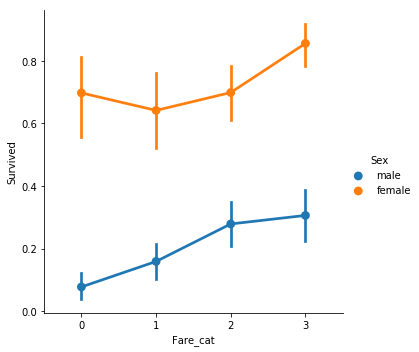

In [57]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [58]:
# Coverting string values into numeric
data['Sex'].replace(['male', 'female'],[0,1], inplace= True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace= True)
data['Initial'].replace(['Mr','Mrs','Miss','Master'],[0,1,2,3], inplace=True )




In [59]:
# dropping unneeded features
# Name
# Age: we have the age band feature, so no need of this
# ticket : cannot be categorised
# fare: we have the fare cat feature, so unneeded
# cabin: a lot of nan values and also many passengers have multiple cabins. so this is a useless
# fare_range : we have the fare cat feature
# passengerId : cannnot be categorised

In [60]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range',
          'Fare_Range_str', 'PassengerId'], axis=1, inplace= True)

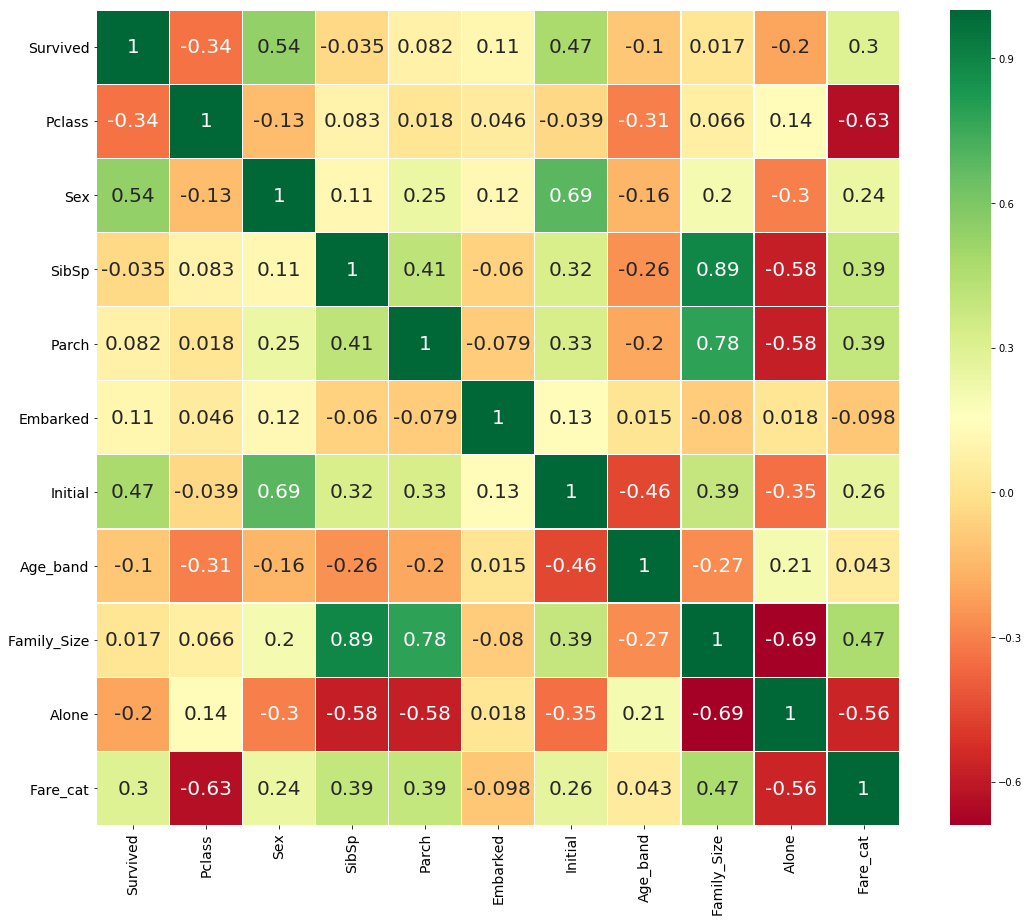

In [61]:
sns.heatmap(data.corr(), annot= True, cmap='RdYlGn', linewidths=0.2,
           annot_kws={'size':20})
fig= plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

In [62]:
# predictive modeling
#(1) logistic regression
#(2) SVM
#(3) Random Forest
#(4) KNN
#(5) Naive Bayes
#(6) Decision Tree

In [63]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
train, test= train_test_split(data, test_size=0.3, random_state=0,
                             stratify= data['Survived'])
train_X= train[train.columns[1:]]
train_Y= train[train.columns[:1]]
test_X= test[test.columns[1:]]
test_Y= test[test.columns[:1]]
X= data[data.columns[1:]]
Y= data['Survived']

In [65]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.832089552238806


In [66]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [67]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [68]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [69]:
model=KNeighborsClassifier(n_neighbors= 9) 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8395522388059702


In [70]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [71]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


In [74]:
# cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold= KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear SVM', 'Radial SVM', 'Logistic Regression',
            'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'),
       svm.SVC(kernel='rbf'),
       LogisticRegression(),
       KNeighborsClassifier(n_neighbors=9),
       DecisionTreeClassifier(),
       GaussianNB(),
       RandomForestClassifier(n_estimators=100)]

for i in models:
    model= i
    cv_result= cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2= pd.DataFrame({'CV Mean':xyz, 'Std':std},
                                   index= classifiers)
new_models_dataframe2



,CV Mean,Std
Linear SVM,0.813695,0.039291
Radial SVM,0.827166,0.032217
Logistic Regression,0.818202,0.022165
KNN,0.811511,0.032000
Decision Tree,0.811461,0.021658
Naive Bayes,0.811498,0.027451
Random Forest,0.812584,0.025527


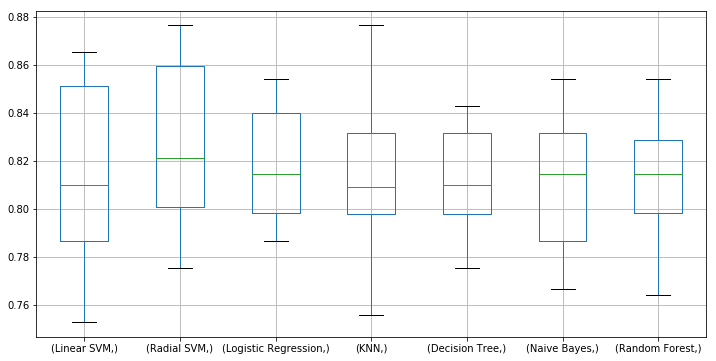

In [78]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

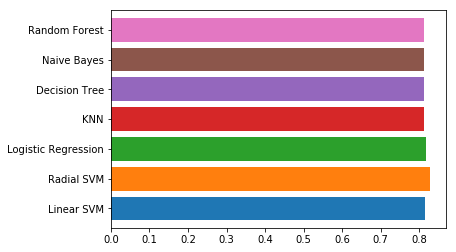

In [84]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
fig= plt.gcf()
#fig.set_size_inches(8,5)
plt.show()

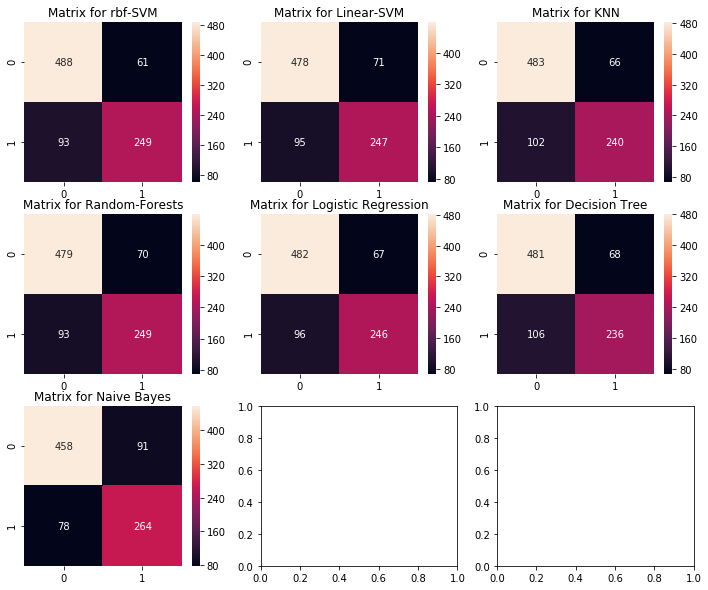

In [86]:
# we can get a summarized result with the help of confusion matrix, 
# which shows where did the model go wrong, or which class did the 
# model predict wrong
# it gives the number of correct and incorrect classifications made by a classifier
f,ax= plt.subplots(3,3,figsize=(12,10))
y_pred= cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0],annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()



In [87]:
# (488+249)/891 = 0.82716
# by looking at all the matices, we can say that rbf-SVM has a higher chance 
# in correctly predicting dead passengers
# but NaiveBayes has a higher chance in correctly predicting passengers who survived.


0.8271604938271605

In [89]:
# Hyper-parameters Tuning
# we will tune the hyper-parameters for the 2 best classifiers
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd= GridSearchCV(estimator= svm.SVC(), param_grid=hyper, verbose=1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)







Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8271604938271605
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   17.6s finished


In [90]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   34.3s finished


0.813692480359147
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [ ]:
# the best score for rbf-SVM is 82.716% with C=0.5, gamma=0.1
# for Random Forest, score is 81.369% with n_estimators=600

In [ ]:
# Ensembling
# (1) Voting Classifier, (2) Bagging, (3) Boosting

In [92]:
# voting classfire
# it is simple way of combining predictions from may different simple
# machine learning models. it gives an average prediction result
# based on the prediction of all the submodels.
# the submodels are all of diffrent types.

from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=9)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=600,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

print(ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, 
                      cv = 10,scoring = "accuracy")
print(cross.mean())

C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8208955223880597


C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

0.8249276472591079


C:\Anaconda3\envs\kerastalk\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [94]:
# Bagging
# it works by applying similar classifiers on small partitions
# of the dataset and then taking the average of all the predictions.
#  bagging makes use of similar classifiers.

from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8246268656716418
The cross validated score for bagged KNN is: 0.8137660310974917


In [97]:
model=BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=0,n_estimators=600)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8171641791044776
The cross validated score for bagged Decision Tree is: 0.8215815457950288


In [98]:
# Boosting
# Boosting is an ensembling technique which uese sequential learning
# of classfiers. it is a step by step enhancement of weak model.
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())



The cross validated score for AdaBoost is: 0.8238165361479968


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8127054250368857


In [101]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8059641357394167


In [102]:
# we got the highest accuacy for AdaBoost. we will try to increase
# it with hyper-parameter tunning
# Hyper-Parameter Turning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.6min finished


0.8282828282828283
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


In [ ]:
# the maximum accuracy we can get with AdaBosst is 82.82%
# with n_estimators=200 and learning_rate=0.05

In [106]:
ensemble_lin_rbf=VotingClassifier(estimators=[('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('AdaBoost', AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)),
                                              ], 
                       voting='soft').fit(train_X,train_Y)

print(ensemble_lin_rbf.score(test_X,test_Y))
cross= cross_val_score(ensemble_lin_rbf,X,Y, 
                      cv = 10,scoring = "accuracy")
print(cross.mean())







0.835820895522388
0.8260135058449667


0.8260135058449667


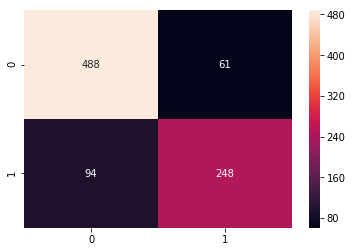

In [111]:
# confusion matrix for the bast model
result= cross_val_predict(ensemble_lin_rbf,X,Y,cv = 10)
cross= cross_val_score(ensemble_lin_rbf,X,Y,cv = 10,scoring = "accuracy")
print(cross.mean())
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()


0.8305081716036773


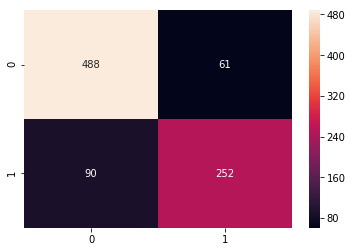

In [112]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
cross= cross_val_score(ada,X,Y, cv = 10,scoring = "accuracy")
print(cross.mean())
result= cross_val_predict(ada,X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()